# U.S. Medical Insurance Cost Portfolio Project

## Goals
***
* Analyze multiple variables in meaningful ways that will provide insight into the dataset
* Implement Data Analyst skills in a real-world scenario
* Utilize Python and its various libraries to model this data in a way that is digestible

Each section of this Notebook will contain code that is being used to analyze the dataset, as well as any findings. The aim is to provide both insights into the data while also showcasing coding and data analysis skills.

### Step 1
***
Convert the CSV data into a pandas DataFrame so that the data can be worked with more directly. This is a two dimensional table that assigns a number to each individual in the dataset. Also, create some general functions that will be useful throughout the analysis.

In [74]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

display(HTML('<style>.container {width: 80% !important}</style'))

insurance_df = pd.read_csv('insurance.csv')

/var/folders/kc/5_q13t6j0hg5x5449rgb645r0000gn/T/ipykernel_81742/19917311.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## General Functions and Global Variables
***
The code below will contain some general functions and variables that do things like:
* Defining the total number of people in the dataset
* Finding a proportion of two numbers and returning the proportion of the larger number to the smaller number
    * I may add a way to return the smaller to larger proportion as well, but currently this suits my needs
* Finding a percentage given a number and a total
* Sorting a DataFrame so that it can be plotted easier
    * **Note**: I know there is a built-in pandas function that does this. That function is called within my sort function so that I can help keep all the code more organized and so that I can keep the global namespace cleaner
* Create a DataFrame from a list with a simple function call

I've decided to organize these together so that the code is overall easier to follow and so that all of these less specific functions can be found in a single location.

In [75]:
# Using len(), find the number of rows (which represents individual people) in the DataFrame
# This variable is used in multiple functions so the global scope is appropriate
num_of_rows = len(insurance_df.index)

# Finds a proportion of two numbers and returns the proportion of the larger value to the smaller value
def proportion(num1, num2):
    if num1 > num2:
        return num1 / num2
    else:
        return num2 / num1

# Finds the percent of a given number as a part of a given total
def percent(num, total):
    return (num / total) * 100

# Sorts a DataFrames (df) rows by column (col) from smallest to largest by default, optionally the order variable can
# be changed to 'desc' to order from largest to smallest
def sort(df, col, order = None):
    if order == 'desc':
        sorted_df = df.sort_values(by=col, ascending=False)
        return sorted_df
    else:
        sorted_df = df.sort_values(by=col)
        return sorted_df

# Creates a DataFrame from a given list and a list of column names
def df_from_lst(lst, cols):
    df = pd.DataFrame(lst, columns = cols)
    return df

### Step 2
***
The next step is finding some averages to compare other information to so that there is some kind of baseline. More specific functions will be created for these.

In [76]:
# I initially had each of these functions as variables in the global scope but decided to rewrite them as functions
# both to keep the global scope clean and to create more modular code

#Average Age
def average_age(df, total = num_of_rows):
    total_age = sum(df['age'])
    avg_age = total_age / total
    return avg_age
print('The average age is: {} years old'.format(round(average_age(insurance_df), 1)))

# Average BMI
def average_bmi(df, total = num_of_rows):
    total_bmi = sum(df['bmi'])
    avg_bmi = total_bmi / total
    return avg_bmi
print('The average BMI is: {}'.format(round(average_bmi(insurance_df), 1)))

# The above steps are repeated for each numerical piece of data

# Average number of children
def average_children(df, total = num_of_rows):
    total_children = sum(df['children'])
    avg_children = total_children / total
    return avg_children
print('The average number of children is: {}'.format(round(average_children(insurance_df), 1)))

# Average Cost
def average_cost(df, total = num_of_rows):
    total_cost = sum(df['cost'])
    avg_cost = total_cost / total
    return avg_cost
print('The average insurance cost is: ${}'.format(round(average_cost(insurance_df), 2)))

The average age is: 39.2 years old
The average BMI is: 30.7
The average number of children is: 1.1
The average insurance cost is: $13270.42


### Step 2.5
***
Find a way to represent the non-numerical values in a numeric way to see if there is any interesting information or data bias that could be revealed. Functions will be written for these unqiue values as well.

        Male/Female Totals
Female                 662
Male                   676
The proportion of males to females is 1.02:1, respectively.


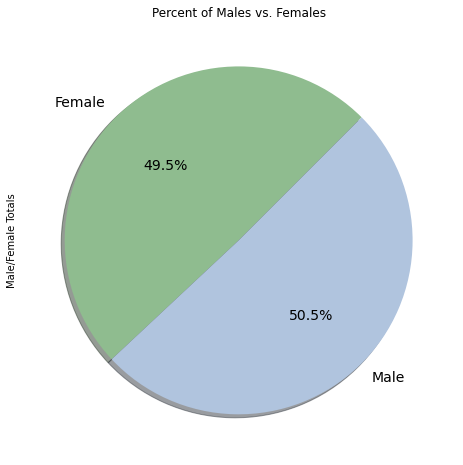

In [77]:
# Returns the total number of males or females given a Dataframe and the string 'male' or 'female'
def total_males_or_females(df, sex):
    total_females = 0
    total_males = 0
    for person in df['sex']:
        if person == 'female':
            total_females += 1
        else:
            total_males += 1
    if sex == 'male':
        return total_males
    elif sex == 'female':
        return total_females
    else:
        return None

sex_df = pd.DataFrame({'Male/Female Totals': [total_males_or_females(insurance_df, 'female'),
                                              total_males_or_females(insurance_df, 'male')]},
                       index = ['Female', 'Male'])

print(sex_df)

# Find the proportion of males to females
sex_proportion = proportion(total_males_or_females(insurance_df, 'female'), total_males_or_females(insurance_df, 'male'))
print('The proportion of males to females is {}:1, respectively.'.format(round(sex_proportion, 2)))

sex_df.plot.pie(y = 'Male/Female Totals',
                figsize = (8, 8),
                title = 'Percent of Males vs. Females',
                colors = ['darkseagreen', 'lightsteelblue'],
                autopct = '%1.1f%%',
                fontsize = 14,
                legend = False,
                shadow = True,
                startangle = 45)
plt.show()



What the above code tells us is that the data set is pretty evenly split bewteen males and females, so there is little sex based bias in the data. Now what about number of smokers?

            Smoker Totals
Smoker                274
Non-Smoker           1064
The proportion of non-smokers to smokers is 3.88:1, respectively.


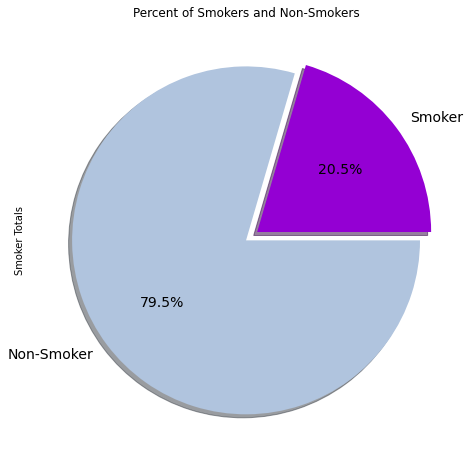

In [78]:
# Returns the total number of smokers or non-smokers given a DataFrame and the string 'smoker' or 'non-smoker'
def total_smoker_status(df, status):
    total_smokers = 0
    total_non_smokers = 0
    for person in df['smoker']:
        if person == 'yes':
            total_smokers += 1
        else:
            total_non_smokers += 1
    if status == 'smoker':
        return total_smokers
    else:
        return total_non_smokers

smoker_df = pd.DataFrame({'Smoker Totals': [total_smoker_status(insurance_df, 'smoker'),
                                           total_smoker_status(insurance_df, 'non-smoker')]},
                          index = ['Smoker', 'Non-Smoker'])
print(smoker_df)

# Find the proportion of total smokers to non-smokers
smoker_proportion = proportion(total_smoker_status(insurance_df, 'smoker'), total_smoker_status(insurance_df, 'non-smoker'))
print('The proportion of non-smokers to smokers is {}:1, respectively.'.format(round(smoker_proportion, 2)))

smoker_df.plot.pie(y = 'Smoker Totals',
                   title = 'Percent of Smokers and Non-Smokers',
                   figsize = (8, 8),
                   colors = ['darkviolet', 'lightsteelblue'],
                   fontsize = 14,
                   autopct = '%1.1f%%',
                   legend = False,
                   shadow = True,
                   explode = (0.08, 0))
plt.show()



These conclusion find that non-smokers in this dataset outnumber smokers almost 4 to 1. This could skew some of the average data that was found in a couple ways:
1. The average cost could be skewed lower because of the lower cost that is assumed to be associated with non-smoking.
2. Average BMI could be skewed slightly higher because the weight of smokers tends to be lower than non-smokers due to the metabolic effect of nicotine (Williams, Why smokers are skinny | science | AAAS 2011).
I'll dive into this later on, but for now, just keep it in mind.

Next I want to find which region is the most prevalent in the dataset.

           Region Totals
Southwest            364
Southeast            325
Northwest            325
Northeast            324


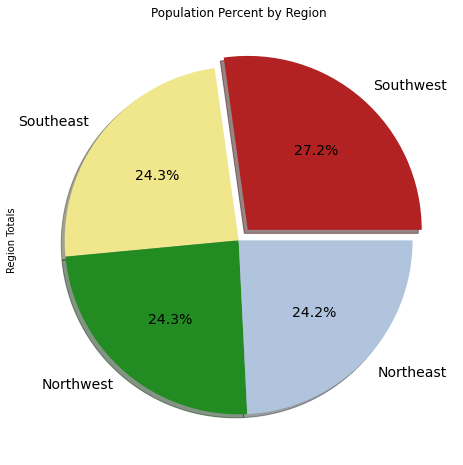

In [79]:
# Finds the total of a region given a DataFrame and the region code: NE, NW, SE, SW
def region_total(df, code):
    total_SW = 0
    total_SE = 0
    total_NW = 0
    total_NE = 0
    for region in df['region']:
        if region == 'southwest':
            total_SW += 1
        elif region == 'southeast':
            total_SE += 1
        elif region == 'northwest':
            total_NW += 1
        else:
            total_NE += 1
    if code == 'SW':
        return total_SW
    elif code == 'SE':
        return total_SE
    elif code == 'NE':
        return total_NE
    else:
        return total_NW

regions_df = pd.DataFrame({'Region Totals': [region_total(insurance_df, 'SE'),
                                     region_total(insurance_df, 'SW'),
                                     region_total(insurance_df, 'NW'),
                                     region_total(insurance_df, 'NE')]},
                           index=['Southwest', 'Southeast', 'Northwest', 'Northeast'])
print(regions_df)
regions_df.plot.pie(y = 'Region Totals',
                    title = 'Population Percent by Region',
                    figsize = (8, 8),
                    autopct = '%1.1f%%',
                    fontsize = 14,
                    colors = ['firebrick', 'khaki', 'forestgreen', 'lightsteelblue'],
                    legend = False,
                    shadow = True,
                    explode = (0.08, 0, 0, 0),
                    startangle = 0)
plt.show()


This finds that the data is pretty evenly distributed among the four regions with the Southeast having a slightly higher representation. Overall, it shouldn't affect the data too much but further analysis will need to be done to determine that.

### Step 3
***
Do more in-depth analysis now that we have some basic totals, averages, percentages, and proportions.

The analyses that will be done will consist of:
* Average age of people with children
* Average age of people who smoke
* Number of smokers who are male vs. female
* Average cost for smokers vs. non-smokers
    * First find the average cost for males and females
* Average BMI of people who smoke
* The average age and BMI in each region
***
These analyses should provide some more interesting information about the dataset as a whole. The conclusions as a whole will be discussed in a section below.


First, the average age of people with children.

In [80]:
# Create a zip object containing all ages and children values for each person
ages_and_children_zip = zip(insurance_df['age'], insurance_df['children'])
ages_and_children = []
# Iterate through the zip object and add each person with at least one child to a list called ages_and_children
for person in ages_and_children_zip:
    if person[1] > 0:
        ages_and_children.append(person)
        
# Create a DataFrame from the list of people with children and their ages
ages_and_children_df = df_from_lst(ages_and_children, ['age', 'children'])

# Prints the average age of those who have children and the differnce from the overall average
print('The average age of people who have children is {0} years old, which is {1} years older than the total average.'
      .format(round(average_age(ages_and_children_df, len(ages_and_children_df)), 1),
              abs(round(average_age(insurance_df) - average_age(ages_and_children_df, len(ages_and_children_df)), 1))))




The average age of people who have children is 39.8 years old, which is 0.6 years older than the total average.


The average age of those who have children is very, very close to the overall average age. This makes sense because the average number of children was found to be a little over 1 per person on average, meaning the majority of people in the dataset have at least one child.

Next, the average age of smokers.

In [81]:
# Create a zip object containing all ages and smoker status values for each person
ages_and_smoker_zip = zip(insurance_df['age'], insurance_df['smoker'])
ages_and_smoker = []
ages_and_non_smoker = []

# Iterates through the zip object and adds the age and smoking status to the proper list
for person in ages_and_smoker_zip:
    if person[1] == 'yes':
        ages_and_smoker.append(person)
    else:
        ages_and_non_smoker.append(person)
      
# Create a DataFrame from the list of people based on their smoking status
ages_and_smoker_df = df_from_lst(ages_and_smoker, ['age', 'smoker'])
ages_and_non_smoker_df = df_from_lst(ages_and_non_smoker, ['age', 'smoker'])

# Prints the average age of those who smoke and the difference from the overall average
print('The average age of people who smoke is {0} years old, which is {1} years younger than the total average.'
      .format(round(average_age(ages_and_smoker_df, len(ages_and_smoker_df)), 1),
              round(average_age(insurance_df) - average_age(ages_and_smoker_df, len(ages_and_smoker_df)), 1)))

# Prints the average age of people who do not smoke and the difference from the overall average
print('The average age of people who do not smoke is {0} years old, which is {1} years older than the total average.'
      .format(round(average_age(ages_and_non_smoker_df, len(ages_and_non_smoker_df)), 1),
              abs(round(average_age(insurance_df) - average_age(ages_and_non_smoker_df, len(ages_and_non_smoker_df)), 1))))

# Prints the difference in age between those who smoke and those who do not
print('The difference between the average age of those who smoke and those who do not is {} years.'
      .format(abs(round(average_age(ages_and_smoker_df, len(ages_and_smoker_df)) - average_age(ages_and_non_smoker_df, len(ages_and_non_smoker_df)), 1))))




The average age of people who smoke is 38.5 years old, which is 0.7 years younger than the total average.
The average age of people who do not smoke is 39.4 years old, which is 0.2 years older than the total average.
The difference between the average age of those who smoke and those who do not is 0.9 years.


Interestingly, the age of both those who smoke and do not smoke is very close to the overall average. The difference between the averages is also very small. This is particularly surprising because only 20.5% of the dataset reports being a smoker which means there must not be a lot of age difference among smokers.

For further smoker analysis, this next section will look at the number of male vs. female smokers.

The proportion of males who smoke to females who smoke is 1.4:1, respectively.


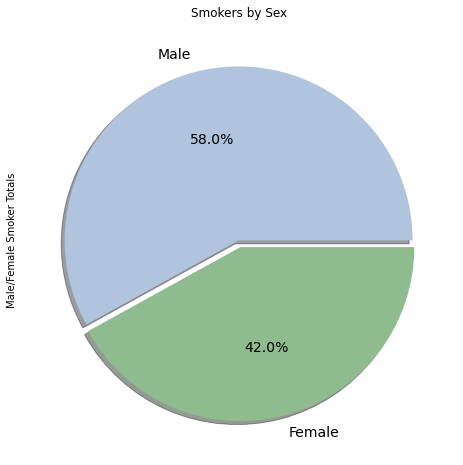

In [82]:
# Create a zip of sex and smoker status
sex_and_smoker_zip = zip(insurance_df['sex'], insurance_df['smoker'])
male_smokers = []
female_smokers = []

# Iterates through the zip object and adds sex and smoking status to the proper list
for person in sex_and_smoker_zip:
    if person[1] == 'yes':
        if person[0] == 'male':
            male_smokers.append(person)
        else:
            female_smokers.append(person)

# Creates DataFrames from the lists of people based on sex
male_smokers_df = df_from_lst(male_smokers, ['sex', 'smoker'])
female_smokers_df = df_from_lst(female_smokers, ['sex', 'smoker'])

# Print the proportion of males who smoke to females who smoke
print('The proportion of males who smoke to females who smoke is {}:1, respectively.'
      .format(round(proportion(len(male_smokers_df), len(female_smokers_df)), 1)))

# Creates a DataFrame to plot the totals for males and females who smoke
smokers_and_sex_df = pd.DataFrame({'Male/Female Smoker Totals': [total_males_or_females(male_smokers_df, 'male'),
                                                                 total_males_or_females(female_smokers_df, 'female')]},
                                   index = ['Male', 'Female'])

# Plots the data on a pie chart
smokers_and_sex_df.plot.pie(y = 'Male/Female Smoker Totals',
                            title = 'Smokers by Sex',
                            figsize = (8, 8),
                            autopct = '%1.1f%%',
                            fontsize = 14,
                            legend = False,
                            shadow = True,
                            colors = ['lightsteelblue', 'darkseagreen'],
                            explode = (0, 0.04))
plt.show()

The number of males who smoke is 16% higher than females who smoke, as seen in the graph above. We could infer that this would likely mean that the average cost of insurance for males is higher than females, given that the cost for smokers is likely higher than non-smokers. This hypothesis will be analyzed next.

In [102]:
# Create zip object of sex and charges (cost)
sex_cost_zip = zip(insurance_df['sex'], insurance_df['cost'])
male_cost = []
female_cost = []

# Iterates through the zip object and seperates each person by sex into the proper list
for person in sex_cost_zip:
    if person[0] == 'male':
        male_cost.append(person)
    else:
        female_cost.append(person)

# Create two new DataFrames from the lists
male_cost_df = df_from_lst(male_cost, ['sex', 'cost'])
female_cost_df = df_from_lst(female_cost, ['sex', 'cost'])


# Find the average cost of insurance for males and females
print('The average insurance cost for all males is ${male}, while the average for all females is ${female}. This is a difference of ${diff}'
      .format(male = round(average_cost(male_cost_df, len(male_cost_df)), 2),
              female = round(average_cost(female_cost_df, len(female_cost_df)), 2),
              diff = round(average_cost(male_cost_df, len(male_cost_df)) - average_cost(female_cost_df, len(female_cost_df)), 2)))

# These lists will be used for analyzing smoker cost vs non-smoker cost
sex_cost_smoker_zip = zip(insurance_df['sex'], insurance_df['cost'], insurance_df['smoker'])
smoker_cost = []
non_smoker_cost = []
male_smoker_cost = []
female_smoker_cost = []
male_non_smoker_cost = []
female_non_smoker_cost = []
# Iterates through zip object and seperates each person by both smoker status and sex
for person in sex_cost_smoker_zip:
    if person[2] == 'yes':
        smoker_cost.append(person)
        if person[0] == 'male':
            male_smoker_cost.append(person)
        else:
            female_smoker_cost.append(person)
    else:
        non_smoker_cost.append(person)
        if person[0] == 'male':
            male_non_smoker_cost.append(person)
        else:
            female_non_smoker_cost.append(person)

# Create DataFrames for smoker_cost and non_smoker_cost
smoker_cost_df = df_from_lst(smoker_cost, ['sex', 'cost', 'smoker'])
non_smoker_cost_df = df_from_lst(non_smoker_cost, ['sex', 'cost', 'smoker'])
# Print the average smoker cost, non-smoker cost, and a comparison
print('The average insurance cost for all smokers is ${smoker}, the average cost for all non-smokers is ${non_smoker}, and the difference between them is ${diff}'
      .format(smoker = round(average_cost(smoker_cost_df, len(smoker_cost_df)), 2),
              non_smoker = round(average_cost(non_smoker_cost_df, len(non_smoker_cost_df)), 2), 
              diff = round(average_cost(smoker_cost_df, len(smoker_cost_df)) - average_cost(non_smoker_cost_df, len(non_smoker_cost_df)), 2)))
print('The average insurance cost for all smokers is ${diff1} higher than the average for all people in the dataset, and the average cost for non-smokers is ${diff2} lower than the average for all people in the dataset.'
      .format(diff1 = round(average_cost(smoker_cost_df, len(smoker_cost_df)) - average_cost(insurance_df), 2), 
              diff2 = round(average_cost(insurance_df) - average_cost(non_smoker_cost_df, len(non_smoker_cost_df)), 2)))

# Create DataFrames for male_smoker_cost, female_smoker_cost, male_non_smoker_cost, and female_non_smoker_cost
male_smoker_cost_df = df_from_lst(male_smoker_cost, ['sex', 'cost', 'smoker'])
female_smoker_cost_df = df_from_lst(female_smoker_cost, ['sex', 'cost', 'smoker'])
male_non_smoker_cost_df = df_from_lst(male_non_smoker_cost, ['sex', 'cost', 'smoker'])
female_non_smoker_cost_df = df_from_lst(female_non_smoker_cost, ['sex', 'cost', 'smoker'])
# Print the average male smoker cost, average female smoker cost, average male non-smoker cost, average female non-smoker cost, and some comparisons
print('The average insurance cost for male smokers is ${male}, while the average for female smokers is ${female}. The difference between them is ${diff}'
      .format(male = round(average_cost(male_smoker_cost_df, len(male_smoker_cost_df)), 2), 
              female = round(average_cost(female_smoker_cost_df, len(female_smoker_cost_df)), 2),
              diff = round(average_cost(male_smoker_cost_df, len(male_smoker_cost_df)) - average_cost(female_smoker_cost_df, len(female_smoker_cost_df)), 2)))
print('The average insurance cost for male non-smokers is ${male}, while the average for female non-smokers is ${female}. The difference between them is ${diff}'
      .format(male = round(average_cost(male_non_smoker_cost_df, len(male_non_smoker_cost_df)), 2), 
              female = round(average_cost(female_non_smoker_cost_df, len(female_non_smoker_cost_df)), 2),
              diff = round(average_cost(female_non_smoker_cost_df, len(female_non_smoker_cost_df)) - average_cost(male_non_smoker_cost_df, len(male_non_smoker_cost_df)), 2)))
print('The difference in average insurance cost between male smokers and male non-smokers is ${male_diff}, and the difference between female smokers and female non-smokers is ${female_diff}'
      .format(male_diff = round(average_cost(male_smoker_cost_df, len(male_smoker_cost_df)) - average_cost(male_non_smoker_cost_df, len(male_non_smoker_cost_df)), 2),
              female_diff = round(average_cost(female_smoker_cost_df, len(female_smoker_cost_df)) - average_cost(female_non_smoker_cost_df, len(female_non_smoker_cost_df)), 2)))




The average insurance cost for all males is $13956.75, while the average for all females is $12569.58. This is a difference of $1387.17
The average insurance cost for all smokers is $32050.23, the average cost for all non-smokers is $8434.27, and the difference between them is $23615.96
The average insurance cost for all smokers is $18779.81 higher than the average for all people in the dataset, and the average cost for non-smokers is $4836.15 lower than the average for all people in the dataset.
The average insurance cost for male smokers is $33042.01, while the average for female smokers is $30679.0. The difference between them is $2363.01
The average insurance cost for male non-smokers is $8087.2, while the average for female non-smokers is $8762.3. The difference between them is $675.09
The difference in average insurance cost between male smokers and male non-smokers is $24954.8, and the difference between female smokers and female non-smokers is $21916.7


There are some interesting conclusions that can be drawn from the above analysis:
***
First, the hypothesis that overall average male insurance costs are  greater than overall average female insurance costs due to there being more male smokers was *likely* correct. This will be proven further in the other points below.
***
Second, the cost for insurance increases **greatly** for smokers. This means that the general average cost is skewed by the cost for smokers, despite the fact that smokers only make up 20.5% of the total dataset. In general, this means that the average cost for the whole dataset isn't particularly useful because it's not very representative of the dataset as a whole.
***
Finally, the average cost for male smokers is higher than that of female smokers. Interestingly, though, the average for male non-smokers is **lower** than female non-smokers. This is interesting because:
1. It further proves the hypothesis from the first point. When we only look at non-smokers, males pay less on average for insurance.
2. It raises further questions as to why female average insurance costs would be higher? One possible reason is that, in general, women are more likely to go to the doctor for illness, annual exams, etc. (NCHS pressroom - 2001 news release - women visit doctor more often than men 2006)


This next section will look at the relationship between BMI and smoking status.

In [115]:
# Use list comprehensions and the df_from_lst function to create DataFrames
sex_bmi_smoker_zip = zip(insurance_df['sex'], insurance_df['bmi'], insurance_df['smoker'])
male_bmi_smoker_df = df_from_lst([person for person in sex_bmi_smoker_zip if person[0] == 'male' and person[2] == 'yes'], ['sex', 'bmi', 'smoker'])

sex_bmi_smoker_zip = zip(insurance_df['sex'], insurance_df['bmi'], insurance_df['smoker'])
female_bmi_smoker_df = df_from_lst([person for person in sex_bmi_smoker_zip if person[0] == 'female' and person[2] == 'yes'], ['sex', 'bmi', 'smoker'])

sex_bmi_smoker_zip = zip(insurance_df['sex'], insurance_df['bmi'], insurance_df['smoker'])
male_bmi_non_smoker_df = df_from_lst([person for person in sex_bmi_smoker_zip if person[0] == 'male' and person[2] == 'no'], ['sex', 'bmi', 'smoker'])

sex_bmi_smoker_zip = zip(insurance_df['sex'], insurance_df['bmi'], insurance_df['smoker'])
female_bmi_non_smoker_df = df_from_lst([person for person in sex_bmi_smoker_zip if person[0] == 'female' and person[2] == 'no'], ['sex', 'bmi', 'smoker'])

# Print average BMI for male smokers and non-smokers, and female smokers and non-smokers
print('The average BMI for male smokers is {smoker} and for male non-smokers it is {non_smoker}. This is a difference of {diff}'
      .format(smoker = round(average_bmi(male_bmi_smoker_df, len(male_bmi_smoker_df)), 2), 
              non_smoker = round(average_bmi(male_bmi_non_smoker_df, len(male_bmi_non_smoker_df)), 2),
              diff = round(average_bmi(male_bmi_smoker_df, len(male_bmi_smoker_df)) - average_bmi(male_bmi_non_smoker_df, len(male_bmi_non_smoker_df)), 2)))

print('The average BMI for female smokers is {smoker} and for female non-smokers it is {non_smoker}. This is a difference of {diff}'
      .format(smoker = round(average_bmi(female_bmi_smoker_df, len(female_bmi_smoker_df)), 2), 
              non_smoker = round(average_bmi(female_bmi_non_smoker_df, len(female_bmi_non_smoker_df)), 2),
              diff = abs(round(average_bmi(female_bmi_smoker_df, len(female_bmi_smoker_df)) - average_bmi(female_bmi_non_smoker_df, len(female_bmi_non_smoker_df)), 2))))

The average BMI for male smokers is 31.5 and for male non-smokers it is 30.77. This is a difference of 0.73
The average BMI for female smokers is 29.61 and for female non-smokers it is 30.54. This is a difference of 0.93


Contrary to the article cited above (citation number 1), smoker BMI isn't significantly lower than non-smoker BMI as previosuly thought. For males, smoker BMI is actually higher than non-smoker BMI. For females, smoker BMI is lower than non-smoker BMI, but by less than 1 point.

Lastly, this section will look at the relationship between average age and BMI between regions.

In [123]:
# Use list comprehensions and the df_from_lst function to create DataFrames for each region
age_bmi_region_zip = zip(insurance_df['age'], insurance_df['bmi'], insurance_df['region'])
age_bmi_NW_df = df_from_lst([person for person in age_bmi_region_zip if person[2] == 'northwest'], ['age', 'bmi', 'region'])

age_bmi_region_zip = zip(insurance_df['age'], insurance_df['bmi'], insurance_df['region'])
age_bmi_NE_df = df_from_lst([person for person in age_bmi_region_zip if person[2] == 'northeast'], ['age', 'bmi', 'region'])

age_bmi_region_zip = zip(insurance_df['age'], insurance_df['bmi'], insurance_df['region'])
age_bmi_SW_df = df_from_lst([person for person in age_bmi_region_zip if person[2] == 'southwest'], ['age', 'bmi', 'region'])

age_bmi_region_zip = zip(insurance_df['age'], insurance_df['bmi'], insurance_df['region'])
age_bmi_SE_df = df_from_lst([person for person in age_bmi_region_zip if person[2] == 'southeast'], ['age', 'bmi', 'region'])

# Print average BMI and age for each region

# Northwest
print('The average age in the Northwest is {age} years old and the average BMI is {bmi}'
      .format(age = round(average_age(age_bmi_NW_df, len(age_bmi_NW_df)), 2),
              bmi = round(average_bmi(age_bmi_NW_df, len(age_bmi_NW_df)), 2)))

# Northeast
print('The average age in the Northeast is {age} years old and the average BMI is {bmi}'
      .format(age = round(average_age(age_bmi_NE_df, len(age_bmi_NE_df)), 2),
              bmi = round(average_bmi(age_bmi_NE_df, len(age_bmi_NE_df)), 2)))

# Southwest
print('The average age in the Southwest is {age} years old and the average BMI is {bmi}'
      .format(age = round(average_age(age_bmi_SW_df, len(age_bmi_SW_df)), 2),
              bmi = round(average_bmi(age_bmi_SW_df, len(age_bmi_SW_df)), 2)))

# Southeast
print('The average age in the Southeast is {age} years old and the average BMI is {bmi}'
      .format(age = round(average_age(age_bmi_SE_df, len(age_bmi_SE_df)), 2),
              bmi = round(average_bmi(age_bmi_SE_df, len(age_bmi_SE_df)), 2)))

The average age in the Northwest is 39.2 years old and the average BMI is 29.2
The average age in the Northeast is 39.27 years old and the average BMI is 29.17
The average age in the Southwest is 39.46 years old and the average BMI is 30.6
The average age in the Southeast is 38.94 years old and the average BMI is 33.36


The average age among regions is nearly identical, with the largest difference being 0.52 years between the Southwest and Southeast. A difference of a little over 6 months is likely not statistically significant. 
Average BMI is a little more interesting. Though at first glance, it doesn't seem to vary too much, a 4 point difference is actually fairly high. The Southeast region had the highest BMI. BMI and poverty are closely related (Lee, Why poverty leads to obesity and life-long problems 2012) and poverty rates in the US tend to be higher in Southeast states. This is a great example of an interesting hypothesis that can be created by simply looking at different subsets of data.

## Conclusions
***
By working with this dataset in various ways, we've come across some interesting conclusions:
* The number of male smokers is greater than the number of female smokers.
* The average insurance cost for all males is higher than all females, but further analysis showed that male costs were skewed by smoking status more than female costs.
* The average insurance cost for non-smoking males was lower than non-smoking females.
* There is not a statistically significant difference between the average age in the four regions.
* The Southeast region has a significantly higher average BMI than the other regions.
***
## Future Directions
***
Some interesting questions to look into in the future might be:
* Why are female non-smoking insurance costs higher?
* Is the reason for the Southeast region having higher BMI due to poverty?
* Are people who have/do not have children less/more likely to be smokers?

## Citations
1. Williams, S. C. P. (2011, June 9). Why smokers are skinny | science | AAAS. Why Smokers Are Skinny. Retrieved July 20, 2022, from https://www.science.org/content/article/why-smokers-are-skinny 
2. Centers for Disease Control and Prevention. (2006, October 6). NCHS pressroom - 2001 news release - women visit doctor more often than men. Centers for Disease Control and Prevention. Retrieved July 20, 2022, from https://www.cdc.gov/nchs/pressroom/01news/newstudy.htm#:~:text=Women%20more%20likely%20than%20men,likely%20to%20have%20annual%20exams&amp;text=A%20new%20report%20from%20the,their%20care%20differs%20from%20men.
3. Lee, H. (2012, December 1). Why poverty leads to obesity and life-long problems. Scholars Strategy Network. Retrieved July 21, 2022, from https://scholars.org/contribution/why-poverty-leads-obesity-and-life-long-problems